In [71]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

'1.13.1+cu116'

In [72]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)

X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [73]:
y = weight * X + bias

In [74]:
y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [75]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

<BarContainer object of 40 artists>

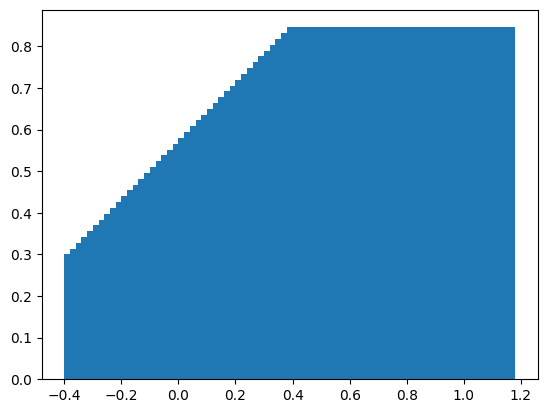

In [76]:
plt.bar(X_train.squeeze(), y_train.squeeze())

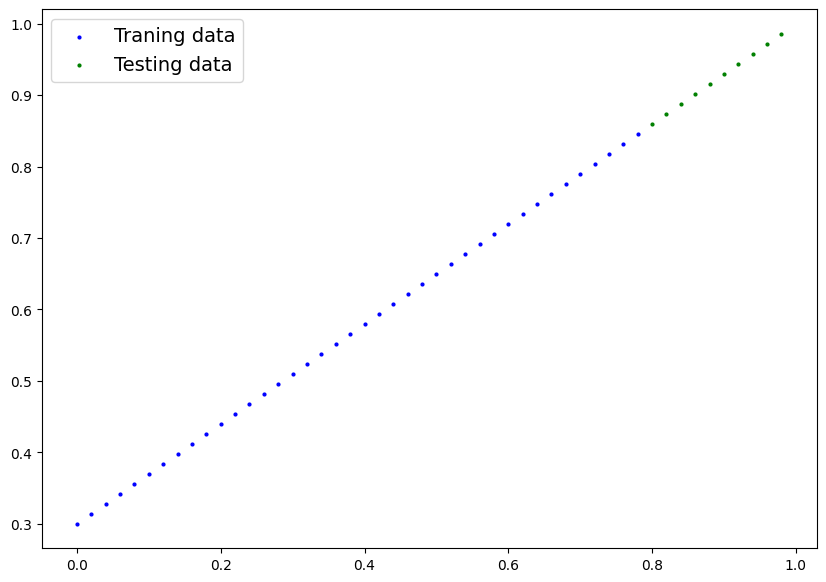

In [77]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    
    plt.figure(figsize=(10, 7))  

    plt.scatter(train_data, train_labels, c="b", s=4, label="Traning data")

    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt .scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})


plot_predictions()

In [78]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1,
                                            requires_grad=True,
                                            dtype=torch.float))
         
    def forward(self, x:torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias


In [79]:
torch.manual_seed(42)

# Model Instane
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [80]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [81]:
y_preds = model_0(X_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]], grad_fn=<AddBackward0>)

In [82]:
# Make predictions

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [83]:
# Similar

with torch.no_grad():
  y_preds = model_0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [84]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

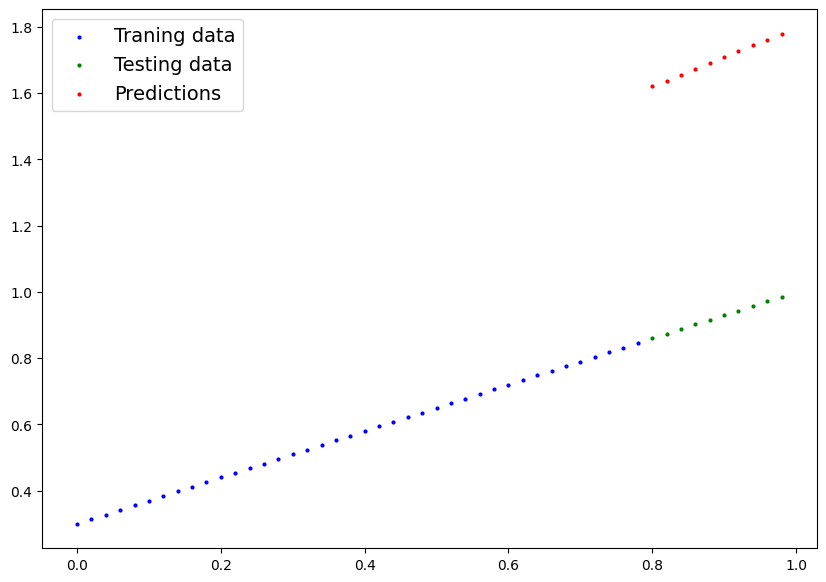

In [85]:
plot_predictions(predictions=y_preds)

In [86]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)


In [87]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [88]:
### Building a training loop
epochs = 200


# Tracking experiment
epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train()  # mode in PyTorch

  y_pred = model_0(X_train)  # forward pass

  loss = loss_fn(y_pred, y_train)  

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()  # perform gradient descent       


  ### Testing
  model_0.eval() # turns off gradient tracking     
  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f'Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}')



Epoch: 0 | Test: 0.6860889196395874 | Test loss: 0.7637526988983154
Epoch: 10 | Test: 0.5708791017532349 | Test loss: 0.6290428042411804
Epoch: 20 | Test: 0.45566922426223755 | Test loss: 0.4943329691886902
Epoch: 30 | Test: 0.34045934677124023 | Test loss: 0.35962313413619995
Epoch: 40 | Test: 0.2252494841814041 | Test loss: 0.2249133139848709
Epoch: 50 | Test: 0.1100396141409874 | Test loss: 0.09020347893238068
Epoch: 60 | Test: 0.009724985808134079 | Test loss: 0.020998019725084305
Epoch: 70 | Test: 0.006216754671186209 | Test loss: 0.014099234715104103
Epoch: 80 | Test: 0.002788322512060404 | Test loss: 0.005826681852340698
Epoch: 90 | Test: 0.007095950655639172 | Test loss: 0.00754010071977973
Epoch: 100 | Test: 0.007095950655639172 | Test loss: 0.00754010071977973
Epoch: 110 | Test: 0.007095950655639172 | Test loss: 0.00754010071977973
Epoch: 120 | Test: 0.007095950655639172 | Test loss: 0.00754010071977973
Epoch: 130 | Test: 0.007095950655639172 | Test loss: 0.00754010071977973


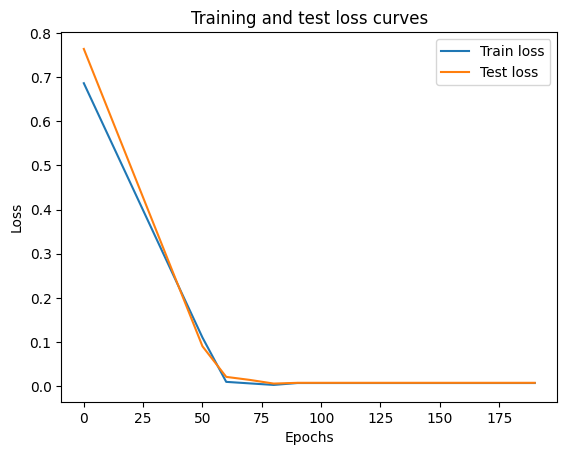

In [89]:
# Plot the loss curves

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [90]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [91]:
loss

tensor(0.0044, grad_fn=<MeanBackward0>)

In [92]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [93]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.6977], requires_grad=True),
 Parameter containing:
 tensor([0.3080], requires_grad=True)]

In [94]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)


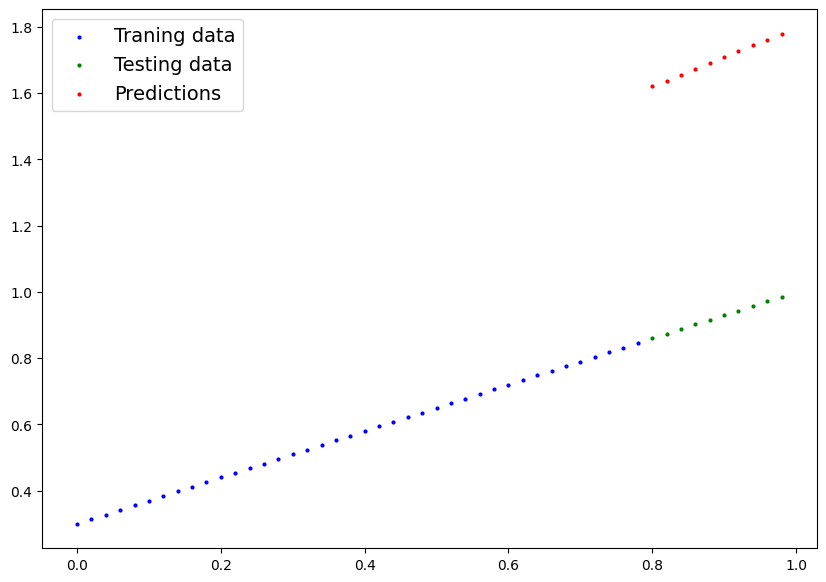

In [95]:
plot_predictions(predictions=y_preds)

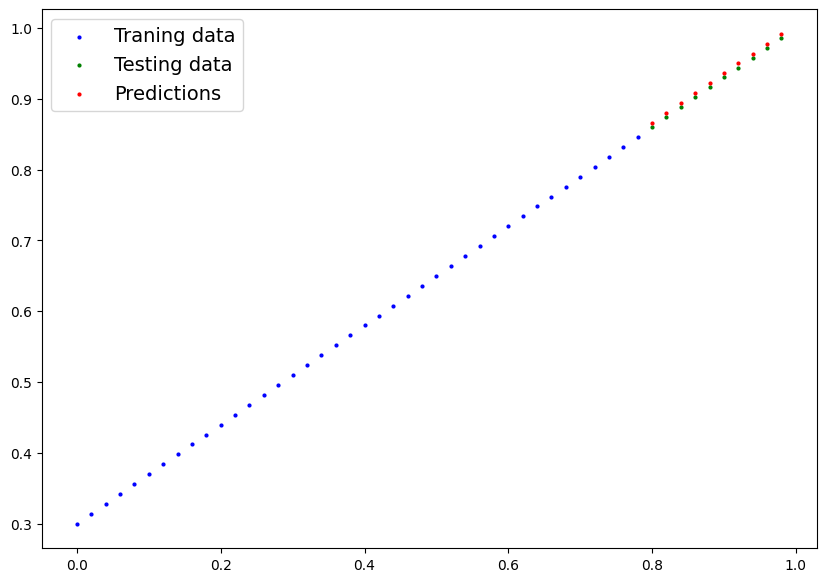

In [96]:
plot_predictions(predictions=y_pred_new)

In [97]:
weight, bias

(0.7, 0.3)

In [98]:
## Saving a model

In [99]:
# Saving and Loading models in PyTorch

In [100]:
from pathlib import Path

# 1. Create a models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create models save path
MODEL_NAME = "Workflow_01_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


# 3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(), 
           f=MODEL_SAVE_PATH)




Saving model to: models/Workflow_01_model.pth


In [101]:
!ls -l models

total 8
-rw-r--r-- 1 root root 1271 Apr  2 13:50 01_pytorch_workflow_model_1.pth
-rw-r--r-- 1 root root 1103 Apr  2 13:55 Workflow_01_model.pth


In [102]:
model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
model_0.eval()

model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [103]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [104]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [105]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = model_0(X_test)

loaded_model_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [106]:
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [107]:
# Putting it all together

In [108]:
import torch 
from torch import nn
import matplotlib.pyplot as plt

In [109]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cpu'

In [110]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [111]:
weight = 0.1
bias = 0.2

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)

y = weight * X + bias

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]
# len(X_train), len(y_train), len(X_test), len(y_test)
X_train

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]])

In [112]:
y_test

tensor([[0.2800],
        [0.2820],
        [0.2840],
        [0.2860],
        [0.2880],
        [0.2900],
        [0.2920],
        [0.2940],
        [0.2960],
        [0.2980]])

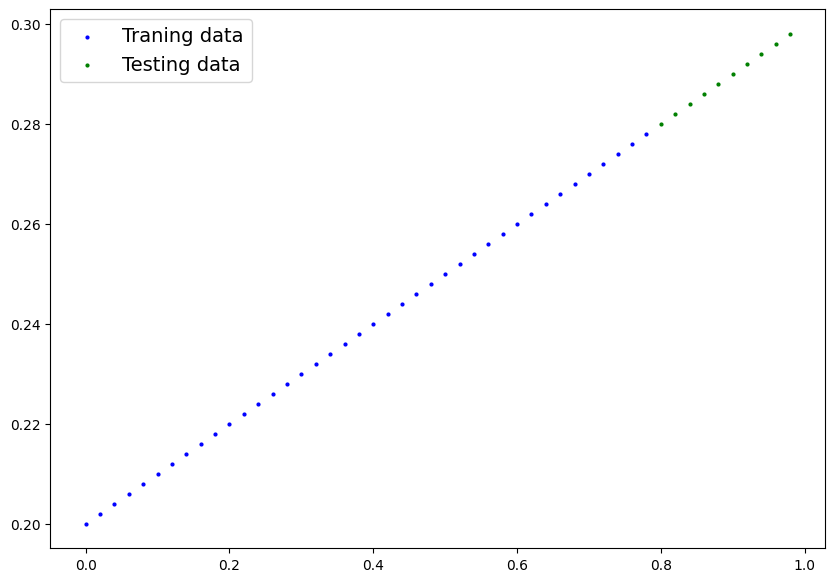

In [113]:
plot_predictions(X_train, y_train, X_test, y_test)

In [114]:
#creating a linear model by subclasing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


torch.manual_seed(42)
model_1 = LinearRegressionModelV2 ()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [115]:
next(model_1.parameters()).device

device(type='cpu')

In [116]:
model_1.to(device)
list(iter(next(model_1.parameters())))

[tensor([0.7645], grad_fn=<UnbindBackward0>)]

In [117]:
# Training
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.001)

# Training loop
torch.manual_seed(42)

epochs = 200

# Tracking experiment
epoch_count = []
loss_values = []
test_loss_values = []

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  ## Printing out what's happening
  if epoch % 10==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')

Epoch: 0 | Loss: 0.8891779184341431 | Test loss: 1.2201001644134521
Epoch: 10 | Loss: 0.8776571154594421 | Test loss: 1.2066293954849243
Epoch: 20 | Loss: 0.8661361932754517 | Test loss: 1.193158507347107
Epoch: 30 | Loss: 0.8546153903007507 | Test loss: 1.179687738418579
Epoch: 40 | Loss: 0.843094527721405 | Test loss: 1.1662168502807617
Epoch: 50 | Loss: 0.8315736651420593 | Test loss: 1.1527460813522339
Epoch: 60 | Loss: 0.8200528025627136 | Test loss: 1.139275312423706
Epoch: 70 | Loss: 0.8085320591926575 | Test loss: 1.1258044242858887
Epoch: 80 | Loss: 0.7970111966133118 | Test loss: 1.1123335361480713
Epoch: 90 | Loss: 0.7854903340339661 | Test loss: 1.0988627672195435
Epoch: 100 | Loss: 0.7739694714546204 | Test loss: 1.0853919982910156
Epoch: 110 | Loss: 0.7624486088752747 | Test loss: 1.0719212293624878
Epoch: 120 | Loss: 0.7509278059005737 | Test loss: 1.05845046043396
Epoch: 130 | Loss: 0.739406943321228 | Test loss: 1.0449795722961426
Epoch: 140 | Loss: 0.7278860807418823 

In [118]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6865]])),
             ('linear_layer.bias', tensor([0.6300]))])

In [119]:
model_1.eval()


with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds


tensor([[1.1792],
        [1.1930],
        [1.2067],
        [1.2204],
        [1.2342],
        [1.2479],
        [1.2616],
        [1.2754],
        [1.2891],
        [1.3028]])

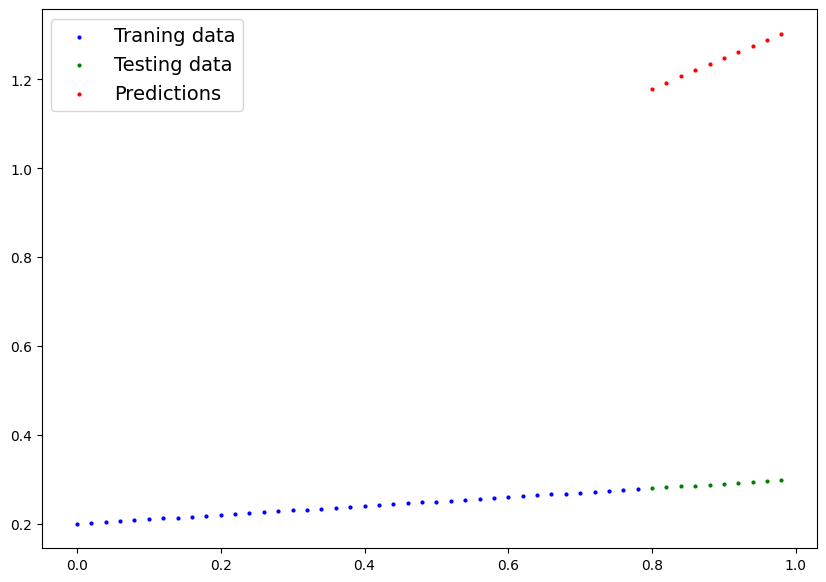

In [120]:
# plot_predictions(predictions=y_preds.cpu())

# y_preds = y_preds.cpu().data.numpy()
# y_preds = model_1.to(device)
# y_preds.device
plot_predictions(train_data=X_train.cpu(),
                  train_labels=y_train.cpu(),
                  test_data=X_test.cpu(),
                  test_labels=y_test.cpu(),
                  predictions=y_preds.cpu())

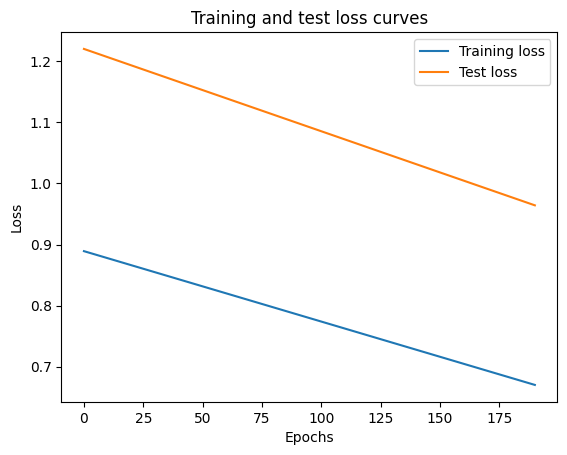

In [121]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Training loss")     
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")     
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();       

In [122]:
from pathlib import Path

# Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [123]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6865]])),
             ('linear_layer.bias', tensor([0.6300]))])

In [124]:
# Load a PyTorch

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loadad model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [125]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [126]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6865]])),
             ('linear_layer.bias', tensor([0.6300]))])

In [127]:
# Evaluated loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

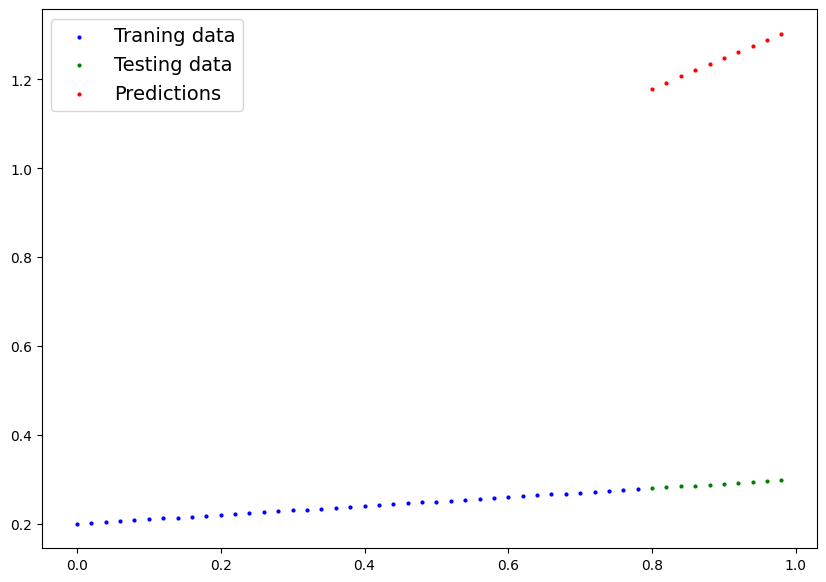

In [128]:
plot_predictions(train_data=X_train.cpu(),
                  train_labels=y_train.cpu(),
                  test_data=X_test.cpu(),
                  test_labels=y_test.cpu(),
                  predictions=loaded_model_1_preds.cpu())

In [129]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[1.1792],
        [1.1930],
        [1.2067],
        [1.2204],
        [1.2342],
        [1.2479],
        [1.2616],
        [1.2754],
        [1.2891],
        [1.3028]])

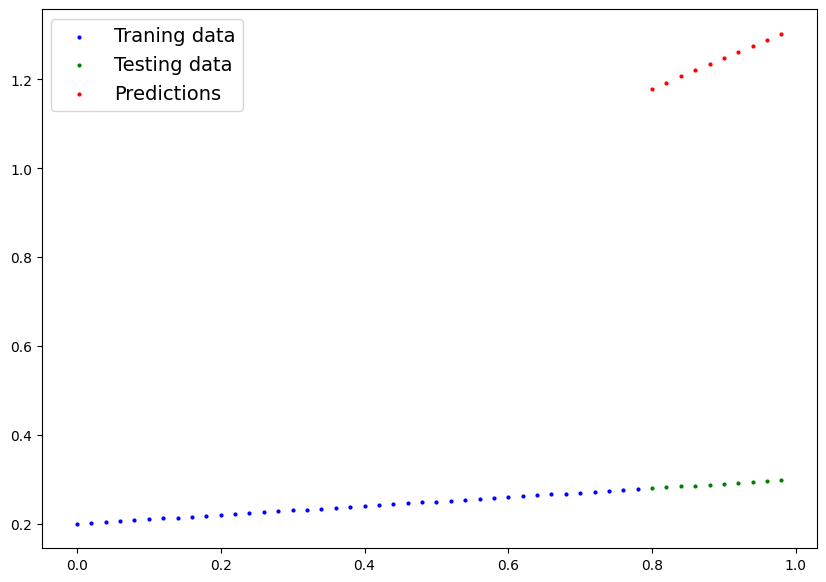

In [130]:
plot_predictions(train_data=X_train.cpu(),
                  train_labels=y_train.cpu(),
                  test_data=X_test.cpu(),
                  test_labels=y_test.cpu(),
                  predictions=y_preds.cpu())

In [131]:
## Excercises, extra curriculum

In [132]:
weight = 0.3
bias = 0.9

start = 0
stop = 3
step = .03

data = torch.arange(start, stop, step).unsqueeze(dim=1)

X = data 
y = weight * data + bias

split = int(0.8 * len(data))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# print(X_test, y_test)

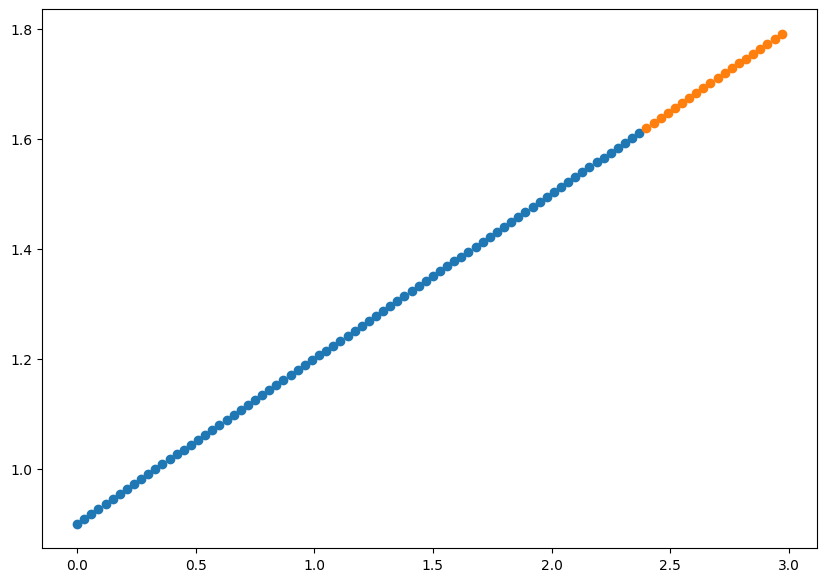

In [133]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
# plt.legend(prop={'size': 14})

In [134]:
class pyTorchExc1(nn.Module):
  def __init__(self):
    super().__init__()  ## must!@
    # self.weight = nn.Parameter(torch.rand(1, requires_grad=True, dtype=float))
    # self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=float))
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    # return self.weight * x + self.bias
    return self.linear_layer(x)


model_ex = pyTorchExc1()
model_ex.state_dict()


OrderedDict([('linear_layer.weight', tensor([[-0.2343]])),
             ('linear_layer.bias', tensor([0.9186]))])

In [135]:
# return X_train, y_train, X_test, y_test, y_test_pred

loss_fn = nn.L1Loss()
optim = torch.optim.SGD(model_ex.parameters(), lr=0.01)

epoch_arr = []
loss_arr = []
test_loss_arr = []

for epoch in range(100):

  model_ex.train()

  y_pred = model_ex.forward(X_train)

  loss = loss_fn(y_pred, y_train)

  optim.zero_grad()

  loss.backward()

  optim.step()

  model_1.eval()
  with torch.inference_mode():
    y_test_pred = model_ex.forward(X_test)

    loss_test = loss_fn(y_test_pred, y_test)

  if epoch % 20 == 0:
    epoch_arr.append(epoch) 
    loss_arr.append(loss)
    test_loss_arr.append(loss_test)

    print(f'epoch: {epoch} | loss: {loss} | test loss: {loss_test}')


epoch: 0 | loss: 0.6150314211845398 | test loss: 1.3746131658554077
epoch: 20 | loss: 0.23129233717918396 | test loss: 0.6117687225341797
epoch: 40 | loss: 0.09309054911136627 | test loss: 0.18847644329071045
epoch: 60 | loss: 0.06629262864589691 | test loss: 0.11473657190799713
epoch: 80 | loss: 0.04103875532746315 | test loss: 0.06988479942083359


In [136]:
len(X_test)

20

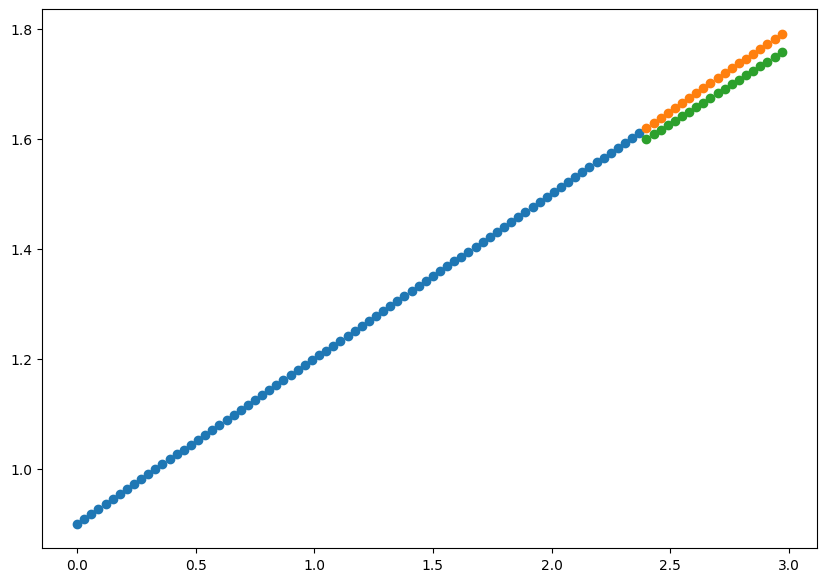

In [137]:
X_train

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_pred.detach())
# plt.legend(prop={'size': 14})

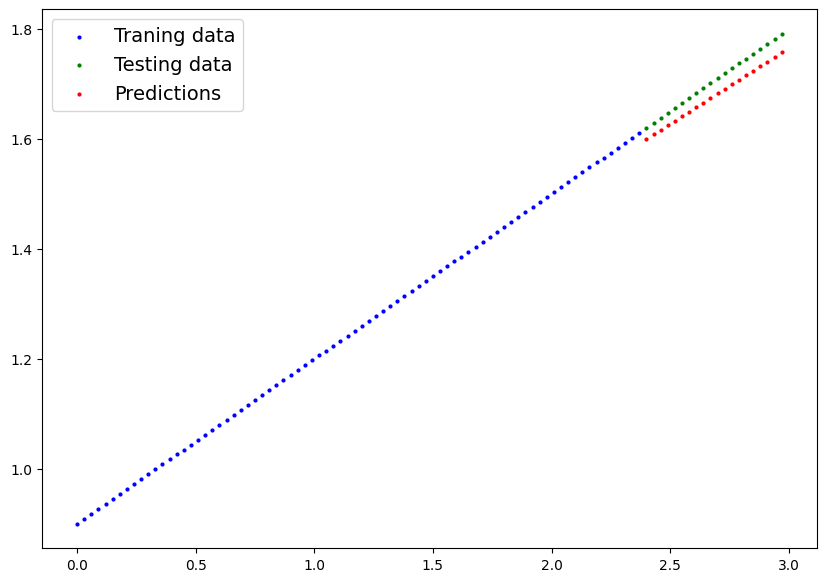

In [138]:
plot_predictions(train_data=X_train.cpu(),
                  train_labels=y_train.cpu(),
                  test_data=X_test.cpu(),
                  test_labels=y_test.cpu(),
                  predictions=y_test_pred.cpu())

In [139]:
model_ex.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2760]])),
             ('linear_layer.bias', tensor([0.9374]))])

In [142]:
from pathlib import Path

MODEL_PATH = Path('my_models')
# MODEL_PATH = MODEL_PATH.mkdir(parents=True, exist_ok=True)
# MODEL_PATH = 'model'

MODEL_NAME = 'model_exer.pt'
MODEL_NAME_PATH = MODEL_PATH / MODEL_NAME

# Save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_ex.state_dict(), f=MODEL_NAME_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [143]:
model_ex_loaded = pyTorchExc1()
model_ex_loaded.load_state_dict(torch.load(MODEL_NAME_PATH))

model_ex_loaded.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2760]])),
             ('linear_layer.bias', tensor([0.9374]))])

In [ ]:
# X_train, y_train, X_test, y_test, y_test_pred = trainings(model_ex_loaded, 200, lr=0.01)

In [166]:
loss_fn = nn.L1Loss()
optim = torch.optim.SGD(model_ex_loaded.parameters(), lr=0.0001)

epoch_arr = []
loss_arr = []
test_loss_arr = []

for epoch in range(200):

  model_ex_loaded.train()

  y_pred = model_ex_loaded(X_train)

  loss = loss_fn(y_pred, y_train)

  optim.zero_grad()

  loss.backward()

  optim.step()

  model_1.eval()
  with torch.inference_mode():
    y_test_pred = model_ex_loaded(X_test)

    loss_test = loss_fn(y_test_pred, y_test)

  if epoch % 20 == 0:
    epoch_arr.append(epoch) 
    loss_arr.append(loss)
    test_loss_arr.append(loss_test)

    print(f'epoch: {epoch} | loss: {loss} | test loss: {loss_test}')

epoch: 0 | loss: 0.0031632862519472837 | test loss: 0.0056036412715911865
epoch: 20 | loss: 0.002910883631557226 | test loss: 0.005154961254447699
epoch: 40 | loss: 0.0026584758888930082 | test loss: 0.004706275649368763
epoch: 60 | loss: 0.0024060807190835476 | test loss: 0.004251318983733654
epoch: 80 | loss: 0.0021536797285079956 | test loss: 0.003802657127380371
epoch: 100 | loss: 0.0019012786215171218 | test loss: 0.003353965235874057
epoch: 120 | loss: 0.00164886936545372 | test loss: 0.002905297325924039
epoch: 140 | loss: 0.0013964682584628463 | test loss: 0.002456623362377286
epoch: 160 | loss: 0.0011440597008913755 | test loss: 0.0020079375244677067
epoch: 180 | loss: 0.0008916541701182723 | test loss: 0.001559269381687045


In [167]:
model_ex_loaded.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2990]])),
             ('linear_layer.bias', tensor([0.9015]))])

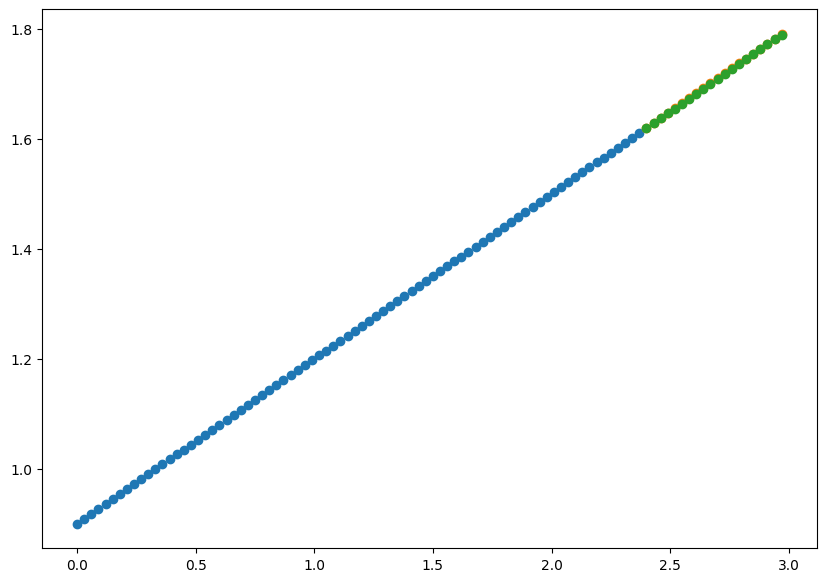

In [168]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_pred.detach())
# plt.legend(prop={'size': 14})

In [169]:
next(loaded_model_1.parameters()).device

device(type='cpu')